#### Prepared by: Rafael M. Moraes

#### rafael.moraes@nyu.edu

#### This notebook was created to discuss the locality characteristic of natural signals: values close to each other tend to be more correlated than values far apart, both in time and space. And this is one of the reasons why convolutions are a big success in these domains: there is no need to analyze values far apart, since they are essentially not correlated to the value in question.
--------------------

# 1 - Distribution of patches from natural images

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
import numpy as np
from scipy.io.wavfile import read
from scipy.signal import correlate2d

Image size: (800, 1200)


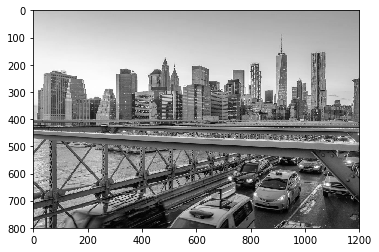

In [2]:
img = np.array(Image.open("nyc.jpeg").convert('L'))
plt.imshow(img, cmap='gray')
print('Image size:', img.shape)

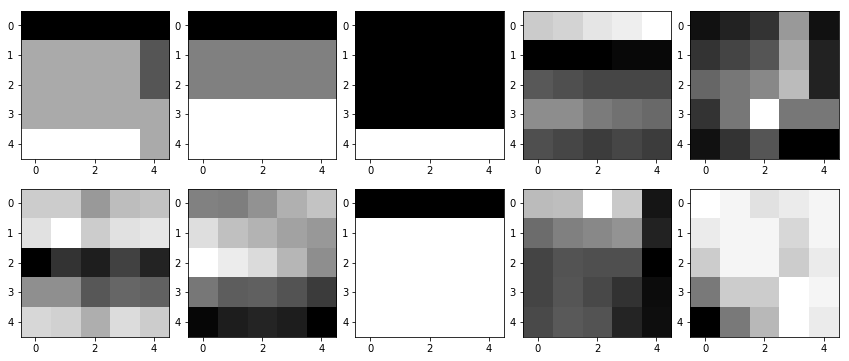

In [3]:
# Extract all patches of size 5x5 from the image

patches = extract_patches_2d(img, (5, 5))
# print(patches.shape) ## There are around 900,000 patches, you can see by uncommenting this line

# Let's select some at random to show
rand_patches_idx = np.random.randint(low=0, high=patches.shape[0], size=10)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i in range(10):
    axs[i].imshow(patches[rand_patches_idx[i], :, :], cmap='gray') #contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)

# Now let's reshape the data for the next step    
patches = np.reshape(patches, (patches.shape[0], 25))
# print(patches.shape)

In [4]:
# Let's reduce the dimension of the data from 25 to 3, so we can show in a plot
pca = PCA(n_components=3)
planar_view = pca.fit_transform(patches)

# Also, let's make sure the numbers are between 0 and 1, so we can compare them below
scalar = MinMaxScaler((0, 1))
planar_view = scalar.fit_transform(planar_view)

Text(0.5, 0.92, 'Random patches')

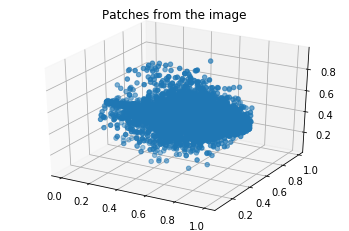

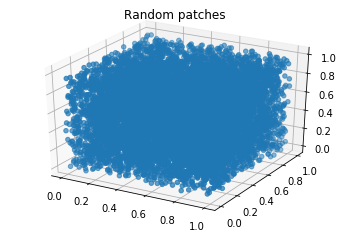

In [5]:
# Choose 10,000 random points and plot them in the 3D view
idx = np.random.randint(low=0, high=planar_view.shape[0], size=10000)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(planar_view[idx, 0], planar_view[idx, 1], planar_view[idx, 2])
ax.set_title('Patches from the image')

# Now let's plot 10,000 random points in the same 0 to 1 scale and see how they are distributed
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.random.rand(10000), np.random.rand(10000), np.random.rand(10000))
ax.set_title('Random patches')

 - As we can see above, a random distribution of points basically fills all this space. On the other hand, randomly selected patches from a natural image are clearly concentrated in some regions of the space.
 
 - The goal of this short example is to show that not all possible patches occur with the same frequency in images, which is one of the reasons why convolutional neural networks are such a success.
 
 # 2 - Autocorrelation analysis - 1D signal (audio)
 
 #  a. Music:
 
 

In [6]:
import IPython.display as ipd

audio = read('bensound-ukulele_short.wav') # free-royalty audio obtained from bensound.com
# 'audio' is a tuple that contains the sample rate and the audio data

print('Sample rate:', audio[0], '\nAudio data:', audio[1])
print('Shape of data:', audio[1].shape)
# We have two columns because the audio is stereo, and the values represent the amplitude of the signal, 
# varying from -32768 to +32767, as defined in the WAV 16-bit PCM.
print('Max:', np.max(audio[1]), '| Min:', np.min(audio[1]))

sample_rate = audio[0]
data = [x[0] for x in audio[1]] # let's use just one channel

Sample rate: 16000 
Audio data: [[    0     0]
 [    0     0]
 [    0     0]
 ...
 [ 2384 10728]
 [ 6829 11098]
 [ 8866 13924]]
Shape of data: (114397, 2)
Max: 31769 | Min: -30479


In [7]:
# Player
ipd.Audio(data, rate=sample_rate)

Text(0.5, 1.0, 'Spectrogram of audio sample')

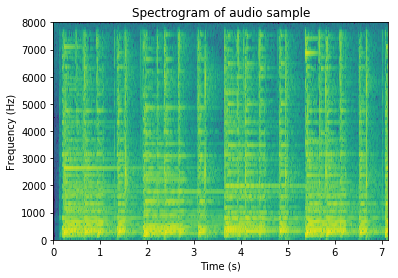

In [8]:
# Let's visualize the spectrogram 
plt.specgram(data, Fs=sample_rate)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of audio sample")

In [9]:
# First, normalize the data
data = (data - np.mean(data)) / np.var(data)

corr = np.correlate(data, data, mode='full')

Text(0.5, 1.0, 'Autocorrelation of audio sample')

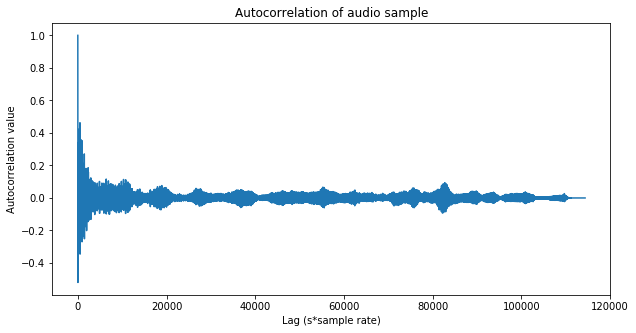

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(corr[data.size-1:] / np.max(corr)) # Use only half of the curve, since it is symmetric
plt.ylabel("Autocorrelation value")
plt.xlabel("Lag (s*sample rate)")
plt.title("Autocorrelation of audio sample")

As we can see above, the highest correlation is obtained for small values of lag and decreases as we increase it. This means that values close in time are much more correlated than values far away. 

Here we can also see a peculiarity of music: since there is a rythm (periodicity), we see some periodic increases in the correlation values.

# b. Person talking

In [11]:
audio = read('random_voice.wav')

print('Sample rate:', audio[0], '\nAudio data:', audio[1])
print('Shape of data:', audio[1].shape)
# We have two columns because the audio is stereo, and the values represent the amplitude of the signal, 
# varying from -32768 to +32767, as defined in the WAV 16-bit PCM.
print('Max:', np.max(audio[1]), '| Min:', np.min(audio[1]))

sample_rate = audio[0]
data = audio[1] # let's use just one channel

Sample rate: 16000 
Audio data: [  202   331   268 ... -1723 -2219 -2422]
Shape of data: (59404,)
Max: 29182 | Min: -30111


/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [12]:
# Player
ipd.Audio(data, rate=sample_rate)

Text(0.5, 1.0, 'Spectrogram of audio sample')

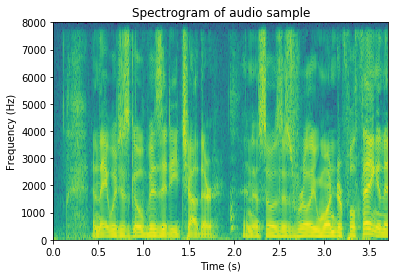

In [13]:
# Let's visualize the spectrogram 
plt.specgram(data, Fs=sample_rate)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of audio sample")

In [14]:
# First, normalize the data
data = (data - np.mean(data)) / np.var(data)
corr = np.correlate(data, data, mode='full')

Text(0.5, 1.0, 'Autocorrelation of audio sample')

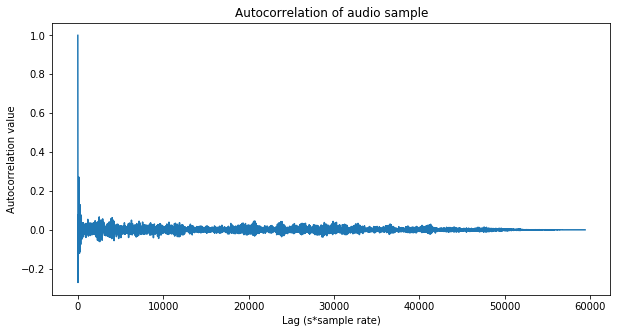

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(corr[data.size-1:] / np.max(corr))
plt.ylabel("Autocorrelation value")
plt.xlabel("Lag (s*sample rate)")
plt.title("Autocorrelation of audio sample")

Here we observe the same as in the previous image: the corelation is much larger for values close to each other. In addition, this content is not periodic as the previous music, so there is no clear periodicity with increasing lag values.

# 3 - Autocorrelation analysis - 2D signal (image)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


New image sizes: (200, 300)


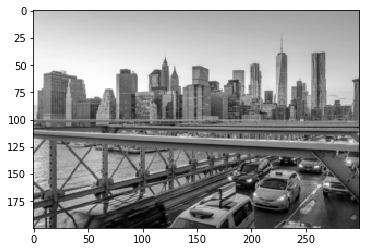

In [16]:
import PIL
from scipy.misc import imresize

# Using the previous image, but in a smaller resolution
img = Image.open("nyc.jpeg").convert('L')
smaller_img = imresize(img, size=0.25)
np_img = np.array(smaller_img)
plt.imshow(np_img, cmap='gray')

print("New image sizes:", np_img.shape)

In [17]:
# First, normalize the data
norm_img = (np_img - np.mean(np_img)) / np.var(np_img)

# Then, convolute the image with itself
corr = correlate2d(norm_img, norm_img, mode='full')

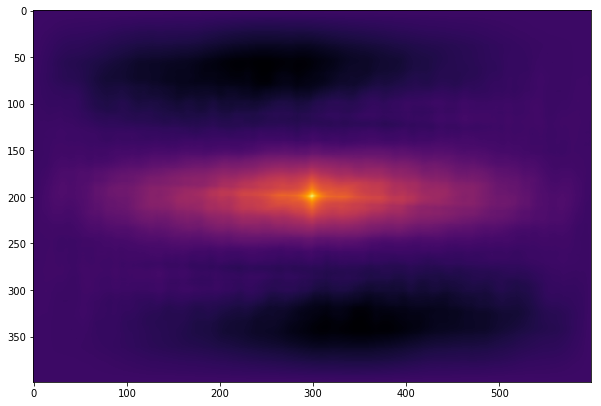

In [18]:
plt.figure(figsize=(10, 10))
plt.imshow(corr / np.max(corr), cmap='inferno')

The way to interpret this image is: in the center there is the correlation value for convoluting the image with itself without displacement (1.0); as we move in some direction, we are convoluting the image with a displaced version of itself. As a consequence, we measure how correlated the values are, accross all the image, for each specific vector of displacement.

Here we observe the same we saw with 1D signals: values close to each other are much more correlated than values far apart.